<a href="https://colab.research.google.com/github/HerraKaava/tensorflow/blob/main/NN-Regression/NN_Regression_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import plot_model
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

In [2]:
print(tf.__version__)

2.15.0


In [109]:
# Read in the insurance dataset
df = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


* **charges** is the *output* variable, which describes "individual medical costs billed by health insurance".

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
df.shape

(1338, 7)

Keep in mind that the data fed to *neural networks* should be numerical. We need to perform some feature engineering to the columns that have type *object*.

In [110]:
# Use map() function to map the categorical values into numerical values
df['sex'] = df['sex'].map({'male': 0, 'female': 1})
df['smoker'] = df['smoker'].map({'no': 0, 'yes': 1})

In [111]:
# Use get_dummies() method to make 3 dummy variables
# from the region variable, which has 4 categories
# (k-1 categories to avoid the dummy variable trap)
region_dummies = pd.get_dummies(df['region'], drop_first=True, dtype=float)

In [112]:
# Drop the original region column and add the dummy columns to df
df = df.drop('region', axis=1)
df['northwest'] = region_dummies['northwest']
df['southeast'] = region_dummies['southeast']
df['southwest'] = region_dummies['southwest']

In [75]:
df.head()

,age,sex,bmi,children,smoker,charges,northwest,southeast,southwest
0,19,1,27.900,0,1,16884.92400,0.0,0.0,1.0
1,18,0,33.770,1,0,1725.55230,0.0,1.0,0.0
2,28,0,33.000,3,0,4449.46200,0.0,1.0,0.0
3,33,0,22.705,0,0,21984.47061,1.0,0.0,0.0
4,32,0,28.880,0,0,3866.85520,1.0,0.0,0.0


In [ ]:
df.shape

(1338, 9)

In [113]:
# Features and labels
X = df.drop('charges', axis=1)
y = df['charges']

In [38]:
print(X.shape)
print(y.shape)

(1338, 8)
(1338,)


In [114]:
# Training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [115]:
# Scale the features for numerical stability.
# Note that neural networks tend to prefer normalization
# instead of standard scaling.
scaler = MinMaxScaler()
scaler.fit(X_train)
scaled_X_train = scaler.transform(X_train)
scaled_X_val = scaler.transform(X_val)

* *Normalization*: converts all values to between 0 and 1 while preserving the original distribution.
* Note that the scaler is fit only on X_train.

In [116]:
print(f"X_train max: {np.max(scaled_X_train, axis=0)}, X_train min: {np.min(scaled_X_train, axis=0)}")

X_train max: [1. 1. 1. 1. 1. 1. 1. 1.], X_train min: [0. 0. 0. 0. 0. 0. 0. 0.]


In [117]:
# Convert to tensors
scaled_X_train = tf.cast(scaled_X_train, dtype=tf.float32)
scaled_X_val = tf.cast(scaled_X_val, dtype=tf.float32)
y_train = tf.cast(y_train, dtype=tf.float32)
y_val = tf.cast(y_val, dtype=tf.float32)

In [118]:
print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_val shape: {X_val.shape}')
print(f'y_val shape: {y_val.shape}')

X_train shape: (1070, 8)
y_train shape: (1070,)
X_val shape: (268, 8)
y_val shape: (268,)


In [119]:
tf.random.set_seed(42)

# Create a model
model1 = tf.keras.Sequential(name='model1')

# Add an input layer
model1.add(tf.keras.Input(shape=(8,), name='input_layer'))

# Add one hidden layer with 10 neurons
model1.add(tf.keras.layers.Dense(units=10, activation='linear', name='hidden_layer1'))

# Add an output layer
model1.add(tf.keras.layers.Dense(units=1, activation='linear', name='output_layer'))

# Compile the model
model1.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.SGD(),
               metrics=['mae'])

* Note that now when we have 8 explanatory variables, the input shape will be (8,).
* This is because we are predicting the $\, ith \,$ label $\, \hat{y}_i \,$ using 8 feature values.
* Note that in the context of a **Dense** layer in a neural network, the term "units" refers to the number of neurons in that layer. For example, if we specify $\, units=10, \,$ it means that the layer will have 10 neurons.
* Note that in a *Neural Network Regression* where we are predicting a single numerical output, the output layer should contain only one neuron.
* This single neuron will produce the continuous value that we are trying to predict.

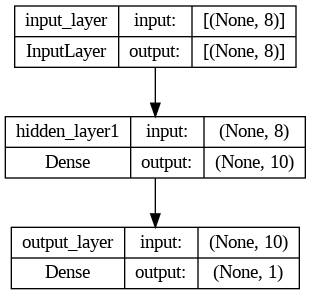

In [83]:
# Visualize the layers of the model
plot_model(model1, show_shapes=True)

In [84]:
model1.summary()

Model: "model1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_layer1 (Dense)       (None, 10)                90        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 101 (404.00 Byte)
Trainable params: 101 (404.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [120]:
# Fit the model
model1.fit(scaled_X_train, y_train, epochs=100, verbose=0)

In [121]:
# Evaluate the model
print(f'training loss: {model1.evaluate(scaled_X_train, y_train)}')
print(f'validation loss: {model1.evaluate(scaled_X_val, y_val)}')

34/34 [==============================] - 0s 1ms/step - loss: 3475.7690 - mae: 3475.7690
training loss: [3475.76904296875, 3475.76904296875]
9/9 [==============================] - 0s 2ms/step - loss: 3166.2134 - mae: 3166.2134
validation loss: [3166.21337890625, 3166.21337890625]


In [122]:
def MAE(y_val, y_pred):
    error = 0
    for i in range(len(y_val)):
        error += abs(y_val[i] - y_pred[i])
    return error / len(y_val)

In [123]:
# Make predictions
model1_y_pred = model1.predict(scaled_X_val)

# Evaluate the model
MAE(y_val, model1_y_pred)

9/9 [==============================] - 0s 3ms/step


<tf.Tensor: shape=(1,), dtype=float32, numpy=array([3166.2126], dtype=float32)>

In [124]:
# Visualize the predictions
def plot_preds(y_val, y_pred):
    plt.figure(figsize=(8,6), dpi=100)
    # Plot the ideal line y=x
    plt.plot([min(y_val), max(y_val)],
             [min(y_val), max(y_val)],
             'r--',
             label='ideal line')
    # Plot true labels vs predictions
    plt.scatter(y_pred, y_val, c='black', label='true vs pred')

    plt.xlabel('y_pred')
    plt.ylabel('y_true')
    plt.grid(True)
    plt.legend();

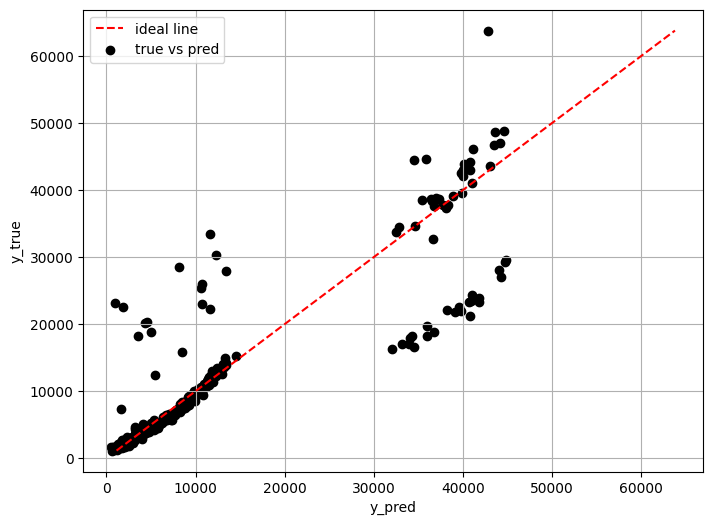

In [125]:
plot_preds(y_val, model1_y_pred)

* A shitty model. Let's try to improve it.

<br>

<h3>Improving the model</h3>

In [126]:
# Add another hidden layer,
# use Adam instead of SGD,
# decrease epochs
tf.random.set_seed(42)
model2 = tf.keras.Sequential(name='model2')
model2.add(tf.keras.Input(shape=(8,), name='input_layer'))
model2.add(tf.keras.layers.Dense(units=10, activation='linear', name='hidden_layer_1'))
model2.add(tf.keras.layers.Dense(units=10, activation='linear', name='hidden_layer_2'))
model2.add(tf.keras.layers.Dense(units=1, activation='linear', name='output_layer'))
model2.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
               metrics=['mae'])
loss_history = model2.fit(scaled_X_train, y_train, epochs=50, verbose=0)

* Note that if the learning rate of the optimizer is too *high*, the loss can diverge to infinity, and in this case the output of the evaluation will be **nan**.
* When we save the fitting process of a model into a variable (as into the history variable above), we save all of the different loss/mae values associated with each epoch.
* We can use these values to visualize the loss as a function of epochs.

In [127]:
type(loss_history.history)

dict

In [128]:
loss_history.history.keys()

dict_keys(['loss', 'mae'])

* Note that both 'loss' and 'mae' gets returned, but these two keys actually contain the exact same values, as seen below.

In [129]:
loss_history.history['loss'] == loss_history.history['mae']

True

In [130]:
# Evaluate the model
print(f'training loss: {model2.evaluate(scaled_X_train, y_train)}')
print(f'validation loss: {model2.evaluate(scaled_X_val, y_val)}')

34/34 [==============================] - 0s 1ms/step - loss: 3493.9248 - mae: 3493.9248
training loss: [3493.9248046875, 3493.9248046875]
9/9 [==============================] - 0s 2ms/step - loss: 3195.9106 - mae: 3195.9106
validation loss: [3195.91064453125, 3195.91064453125]


9/9 [==============================] - 0s 3ms/step


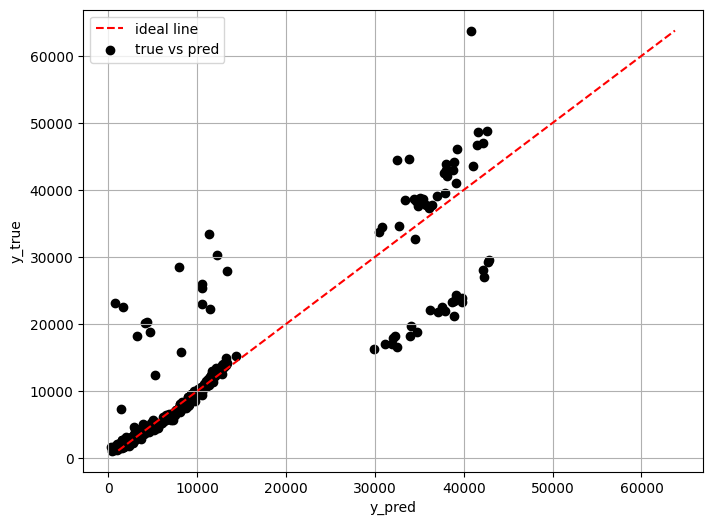

In [131]:
# Visualize the true labels vs. predicted labels
plot_preds(y_val, model2.predict(scaled_X_val))

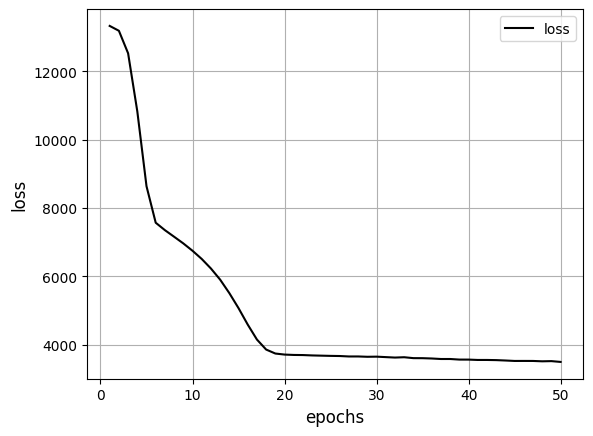

In [135]:
# Plot the loss history (also known as a loss curve / training curve)
plt.plot(np.arange(1, 51), loss_history.history['loss'], c="black", label="loss")
plt.ylabel('loss', size=12)
plt.xlabel('epochs', size=12)
plt.grid(True)
plt.legend();

* [Early stopping callback](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping)
* NOTE that this is the **TRAINING** loss as a function of epochs.

<br>

In [136]:
# Let's see how normal linear regression compares to this
lr_model = LinearRegression()
lr_model.fit(scaled_X_train.numpy(), y_train.numpy())

LinearRegression()

In [137]:
lr_model_y_pred = lr_model.predict(scaled_X_val.numpy())

In [138]:
MAE(y_val, lr_model_y_pred)

<tf.Tensor: shape=(), dtype=float32, numpy=4181.1973>

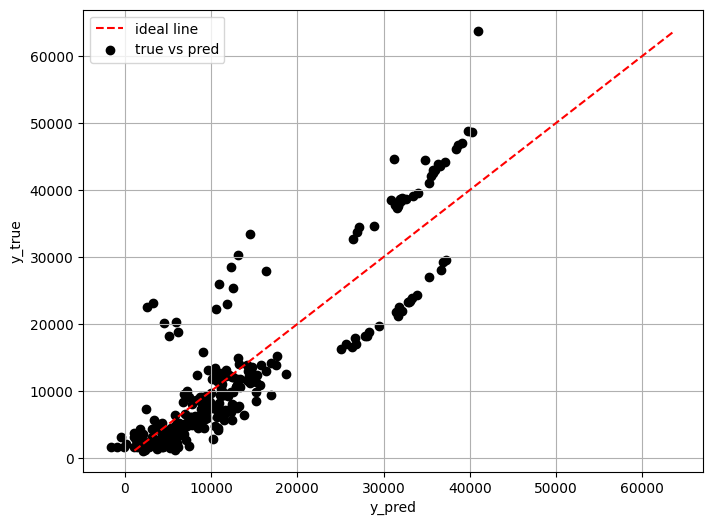

In [139]:
plot_preds(y_val, lr_model_y_pred)

<br>

<h3>Visualizing loss vs. epochs</h3>

Previously we visualized the training curve, that is, (training) loss function as a function of epochs. However, often one would want to visualize both training and testing loss as a function of epochs on the same graph. This can be easily achieved with the **validation_data** parameter.

In [142]:
# Build a NN model
model3 = tf.keras.Sequential(name='model3')
model3.add(tf.keras.Input(shape=(8,), name='input_layer'))
model3.add(tf.keras.layers.Dense(units=10, activation='linear', name='hidden_layer_1'))
model3.add(tf.keras.layers.Dense(units=10, activation='linear', name='hidden_layer_2'))
model3.add(tf.keras.layers.Dense(units=1, activation='linear', name='output_layer'))
model3.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
               metrics=['mae'])

* Now, to include the test loss values into the dictionary returned by the *history* attribute, we need to calculate the test loss at each epoch during the training process.
* This can be achieved by using the **validation_data** parameter of the fit() function, which evaluates the model on the validation data at the end of each epoch.

In [143]:
# Fit the model
loss_HISTORY = model3.fit(scaled_X_train,
                          y_train,
                          epochs=50,
                          validation_data=(scaled_X_val, y_val),
                          verbose=0)

In [145]:
loss_HISTORY.history.keys()

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

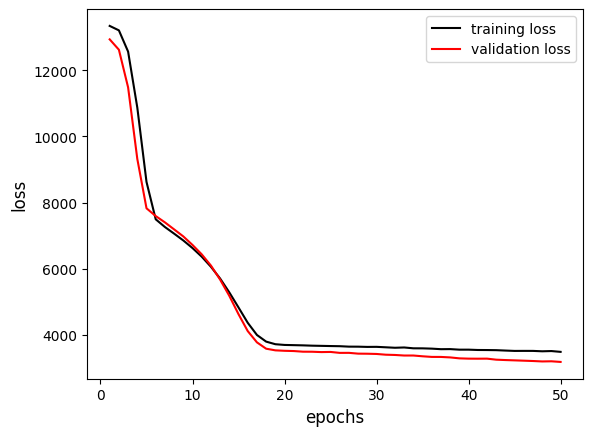

In [148]:
# Visualize both training and validation loss as a function of epochs
plt.plot(np.arange(1, 51), loss_HISTORY.history['loss'], c='black', label='training loss')
plt.plot(np.arange(1, 51), loss_HISTORY.history['val_loss'], c='red', label='validation loss')
plt.xlabel('epochs', size=12)
plt.ylabel('loss', size=12)
plt.legend();